# Quantitative Methods Problem Set

<span style="color:red">0 / 0 points</span>.

This problem set requires you to perform a number of statistical tests on several different datasets you have used throughout this book. Like the Quantitative Methods chapter, you will use either SciPy or pingouin packages to perform different statistical tests.

In [1]:
# This code cell will be in every one of our chapters in Jupyter Notebook
# The function allows you to see every line of output when the code has multiple lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load packages
import pandas as pd
import numpy as np
import scipy.stats as st
import pingouin as pg
import matplotlib.pyplot as plt

## Programming

You will test whether the mean `gdp` of Argentina and Mexico are statistically equal through a series of steps/questions below. 

1. Before you get to the quantitative questions, load the cnts.csv file from the `Python_for_Social_Science/lessons/quantitative_methods/` directory as `cnts`. Then create two vectors, `gdp_arg` and `gdp_mex` that take either country's `gdp` values from the `cnts` dataframe. 

When creating these vectors, make sure to drop any missing values with `.dropna()`.

In [2]:
cnts = pd.read_csv('../../lessons/quantitative_methods/cnts.csv')

cnts.head()

,country,year,gdp,legis03,legis04,legis05,legis06,legis08,leg_eff,pop2,pop,leg_legit
0,AFGHANISTAN,1919,NaN,NaN,NaN,NaN,NaN,NaN,0.0,232.0,23.2,NaN
1,AFGHANISTAN,1920,NaN,NaN,NaN,NaN,NaN,NaN,0.0,243.0,24.3,NaN
2,AFGHANISTAN,1921,NaN,NaN,NaN,NaN,NaN,NaN,0.0,255.0,25.5,NaN
3,AFGHANISTAN,1922,NaN,NaN,NaN,NaN,NaN,NaN,0.0,266.0,26.6,NaN
4,AFGHANISTAN,1923,NaN,NaN,NaN,NaN,NaN,NaN,1.0,278.0,27.8,NaN


In [3]:
gdp_arg = cnts[cnts['country']=='ARGENTINA']['gdp'].dropna()
gdp_mex = cnts[cnts['country']=='MEXICO']['gdp'].dropna()

2. Plot the distribution of `gdp_arg` and `gdp_mex` with a histogram. In another code cell, use SciPy to test both vectors for normality with the [Shapiro-Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Use a comment in your code to write the test-statistic and the p value.

<Axes: ylabel='Frequency'>

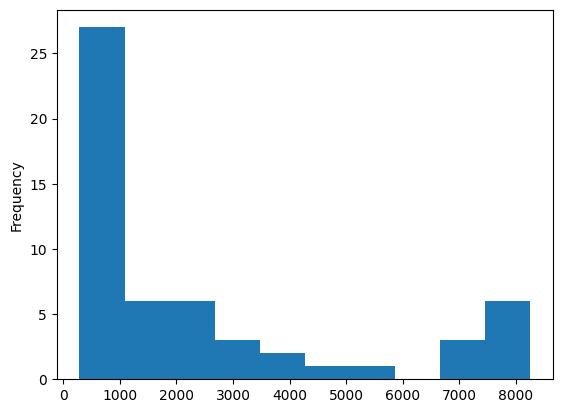

<Axes: ylabel='Frequency'>

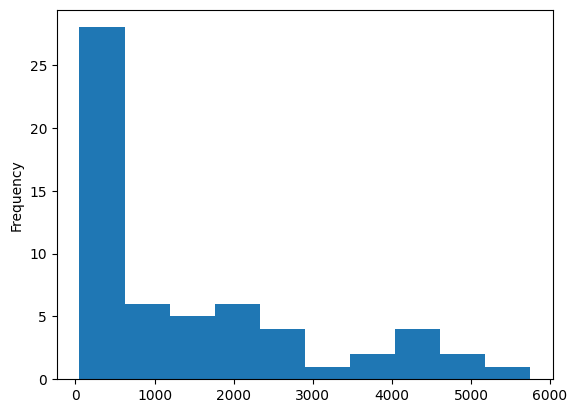

In [4]:
gdp_arg.plot(kind='hist')
plt.show()
gdp_mex.plot(kind='hist')

In [5]:
st.shapiro(gdp_arg) # st=0.756, p=0.00000003
st.shapiro(gdp_mex) # st=0.829, p=0.0000009

ShapiroResult(statistic=0.7556423544883728, pvalue=3.368851864138378e-08)

ShapiroResult(statistic=0.8290200233459473, pvalue=9.134201945926179e-07)

3. Use SciPy to perform the Levene test for equal variances. Use a comment in your code to write the test-statistic and the p value. Remember to use the `center='mean'` argument.

In [6]:
st.levene(gdp_arg, gdp_mex, center='mean') # statistic=11.354, p=0.001

LeveneResult(statistic=11.354001544400228, pvalue=0.001033330485969973)

4. Test the mean difference in GDP between Argentina and Mexico with the pingouin `ttest` function. Make sure you are correcting for unequal variance. In a comment in the code cell, write the test statistic and p-value. Also print the actual mean of both `gdp_arg` and `gdp_mex` with NumPy's mean function.

In [7]:
pg.ttest(gdp_arg, gdp_mex, correction=True) # statistic = 2.20, p=0.024
np.mean(gdp_arg)
np.mean(gdp_mex)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.290869,86.59915,two-sided,0.024399,"[122.49, 1728.93]",0.436728,2.046,0.636867


2413.9454545454546

1488.2372881355932

4. In the data visualization problem set, you created a scatterplot of total housing units and vacant units. That plot indicated some sort of linear relationship. Read in the `housing` data again from the housing.csv file in the `problem_sets/control_structures/` folder. Using SciPy, calculate Pearson's correlation between `TOT_UNITS` and `VACANT`. Don't worry about subsetting the housing data to any particular year or region.
    Use comments to write down the $r$ statistic and p value.

In [8]:
housing = pd.read_csv('../control_structures/housing.csv')

st.pearsonr(housing['TOT_UNITS'],housing['VACANT'])
# r=0.95, p=0.0

PearsonRResult(statistic=0.9498299665629066, pvalue=0.0)

5. There is a strong linear relationship between both variables (which you discussed in the previous assigment). Use the pingouin package to run a simple regression between the two variables, where `TOT_UNITS` is the independent/predictor variable, and `VACANT` is the dependent/outcome variable. Save the regression output to an object named `regression`, then display the values in the object.

In [9]:
regression = pg.linear_regression(X=housing['TOT_UNITS'],y=housing['VACANT'])
regression

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,130.107038,75.082056,1.732865,0.083162,0.902177,0.902163,-17.075779,277.289855
1,TOT_UNITS,0.098341,0.000381,257.954714,0.000000,0.902177,0.902163,0.097594,0.099088


6. Re-create the scatterplot between `TOT_UNITS` and `VACANT` from the data visualization chapter. Again without subsetting by `YEAR`.
    - Also add a regression line over the points. Make the dots red and the line blue. Make the transparency 50% for the dots as well as the regression line.
    - Do not zoom in past outlier observations, so do not use any `xlim` or `ylim` functions.       
    - Additionally, add an annotation without an arrow that states the correlation coefficient (`Pearson's r = ...`), and another for the regression coefficient (`b = ...`).

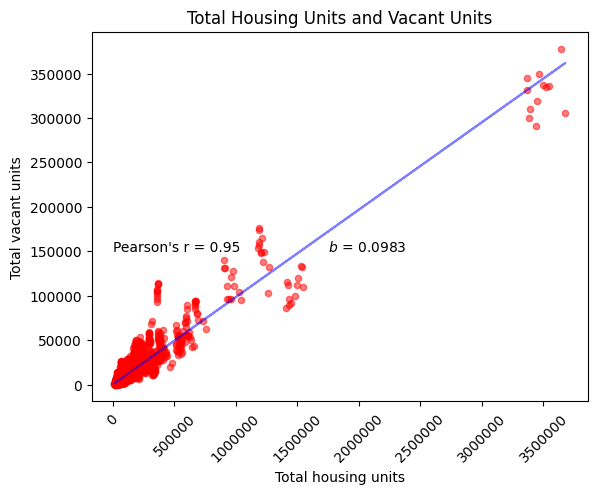

In [47]:
housing.plot(kind='scatter', x='TOT_UNITS', y='VACANT', color='red', alpha=0.5, rot=45)
plt.title('Total Housing Units and Vacant Units')
plt.plot(housing['TOT_UNITS'], regression['coef'][0] + regression['coef'][1]*housing['TOT_UNITS'], 'blue', alpha=0.5)
plt.text(x= 0, y = 150000,s="Pearson's r = 0.95")
plt.text(x= 1750000, y = 150000, s=f'$b$ = {round(regression["coef"][1], 4)}')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total housing units')
plt.ylabel('Total vacant units');

## Interpretation Questions

In this section, you will interpret the outcome of all of the statistical tests you ran in this problem set. For each test you recorded a test statistic or coefficient and a p-value. Every statistical test also comes with its own null-hypothesis. You should also have some degree of confidence (or _alpha_, from the chapter) upon which to compare the p value. 

Given all of this, write your interpretation of the test results for each of the following quantitative procedures. Did you accept or reject the null hypothesis? What was that hypothesis? How does that relate to the actual data? Use a new Markdown cell for each one of your responses.

7. Explain the information conveyed in the histogram plots of GDP in Argentina and Mexico. How does GDP compare between countries? Think about what each row of data means and how that measure of a country's wealth is represented visually.

Argentina had higher GDP than Mexico historically. You can tell by the higher frequencies in the bars to the right compared to Mexico's.

8. In a few words, what was the final result of the indepdent samples t-test?

Argentina and Mexico's mean GDP values were not statistically equivalent. 

9. Based on the coefficient stored in the `regression` object, increasing the value of total housing by _one housing unit_ would predict how many more/less vacant homes in a city?

Each additional home in a city predicts 0.0983 vacant houses.

10. Similarly, how many more/less vacant homes would you predict for city $A$ if it had 10,000 more total housing units than city $B$? 

A city with 10,000 more homes than city B would be predicted to also have 983 more vacant homes.

11. Looking at the scatterplot for housing units and the dispersion of dots/observations around the line, would you say that the model (the regression line) becomes more, or less, or equally accurate as the number of housing units increases?

Visually, the dispersion of dots around the regression line appears to stay a similar distance to the line, so I would say the model is equally accurate for higher values of total housing units. You could possibly argue that the dots are somewhat more disperse at higher values, and be less accurate, but only by a little. 

## Debugging

12. The linear regression code below should display all the correct coefficients for the model where `MED_VALUE` predicts `MED_RENT`. Fix the code in a new code cell so that the regression output displays correctly. 

In [22]:
regression2 = pg.linear_regression(housing[housing['YEAR']==2022]['MED_VALUE'] housing[housing['YEAR']==2022]['MED_RENT'])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3022793920.py, line 1)

In [54]:
regression2 = pg.linear_regression(housing[housing['YEAR']==2022]['MED_VALUE'], housing[housing['YEAR']==2022]['MED_RENT'], remove_na=True)
regression2

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,880.640345,17.581091,50.090198,8.625884e-224,0.736386,0.735975,846.116853,915.163837
1,MED_VALUE,0.001379,0.000033,42.315297,9.660782e-188,0.736386,0.735975,0.001315,0.001443


13. The independent samples t-test below should provide the value of $t$ and $p$ for the mean difference between median home values in 2022 and 2021. Fix the bugs in the line of code in a new code cell so you can get the t-test statistics. 

In [33]:
st.ttest_ind(housing[housing['YEAR']==2022]['MED_VALUE'], housing[housgni['YEAR']==2021]['MED_VALUE'], nan_policy=omit, equal_var=True, alternative='two-sided')


NameError: name 'housgni' is not defined

In [31]:
st.ttest_ind(housing[housing['YEAR']==2022]['MED_VALUE'], housing[housing['YEAR']==2021]['MED_VALUE'], nan_policy='omit', equal_var=True, alternative='two-sided')


TtestResult(statistic=3.5735010119254205, pvalue=0.00036540158870849667, df=1273.0)

14. In the code cell below we re-created the scatterplot from the debugging section of the data visualization problem set. We also added a line of code that superimposes a regression line over the scatterplot, but something warped the distribution of points on the plot. In a new code cell, fix the bug in the code so that the plot displays correctly. 

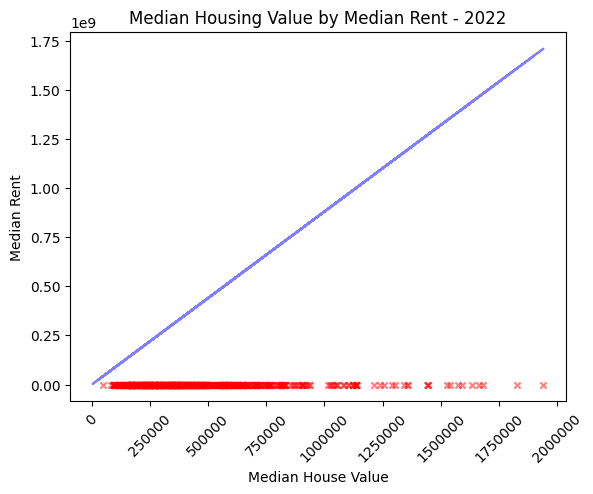

In [59]:
housing[housing['YEAR']==2022].plot(kind='scatter', x='MED_VALUE', y='MED_RENT', 
                                    marker='x', color='red', alpha=0.5, rot=45)
plt.plot(housing['MED_VALUE'], regression2['coef'][1] + regression2['coef'][0]*housing['MED_VALUE'], 'blue', alpha=0.5)
plt.title('Median Housing Value by Median Rent - 2022')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Median House Value')
plt.ylabel('Median Rent');

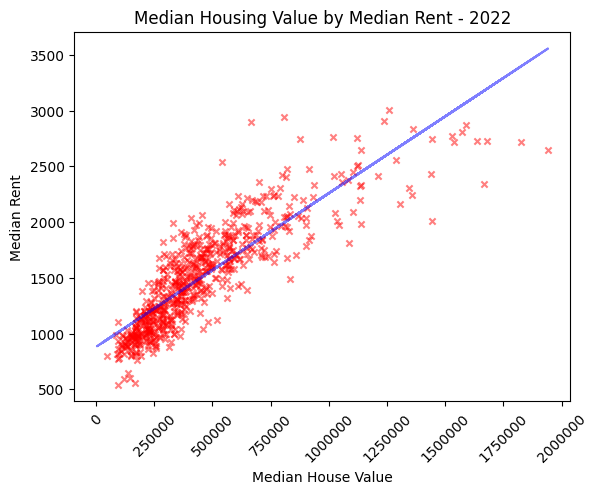

In [60]:
housing[housing['YEAR']==2022].plot(kind='scatter', x='MED_VALUE', y='MED_RENT', 
                                    marker='x', color='red', alpha=0.5, rot=45)
plt.plot(housing['MED_VALUE'], regression2['coef'][0] + regression2['coef'][1]*housing['MED_VALUE'], 'blue', alpha=0.5)
plt.title('Median Housing Value by Median Rent - 2022')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Median House Value')
plt.ylabel('Median Rent');